In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preumonia/sample_solution.csv
/kaggle/input/preumonia/test/test_img_10340.jpeg
/kaggle/input/preumonia/test/test_img_10168.jpeg
/kaggle/input/preumonia/test/test_img_10613.jpeg
/kaggle/input/preumonia/test/test_img_10368.jpeg
/kaggle/input/preumonia/test/test_img_10036.jpeg
/kaggle/input/preumonia/test/test_img_10527.jpeg
/kaggle/input/preumonia/test/test_img_10020.jpeg
/kaggle/input/preumonia/test/test_img_10585.jpeg
/kaggle/input/preumonia/test/test_img_10276.jpeg
/kaggle/input/preumonia/test/test_img_10054.jpeg
/kaggle/input/preumonia/test/test_img_10298.jpeg
/kaggle/input/preumonia/test/test_img_10355.jpeg
/kaggle/input/preumonia/test/test_img_10511.jpeg
/kaggle/input/preumonia/test/test_img_10410.jpeg
/kaggle/input/preumonia/test/test_img_10096.jpeg
/kaggle/input/preumonia/test/test_img_10219.jpeg
/kaggle/input/preumonia/test/test_img_10057.jpeg
/kaggle/input/preumonia/test/test_img_10296.jpeg
/kaggle/input/preumonia/test/test_img_10407.jpeg
/kaggle/input/preumonia/t

In [3]:
import torch
import fastai

fastai.__version__
torch.__version__

'1.12.0'

In [4]:
from ipywidgets import widgets
from fastai.vision.all import *

zip argument #1 must support iteration


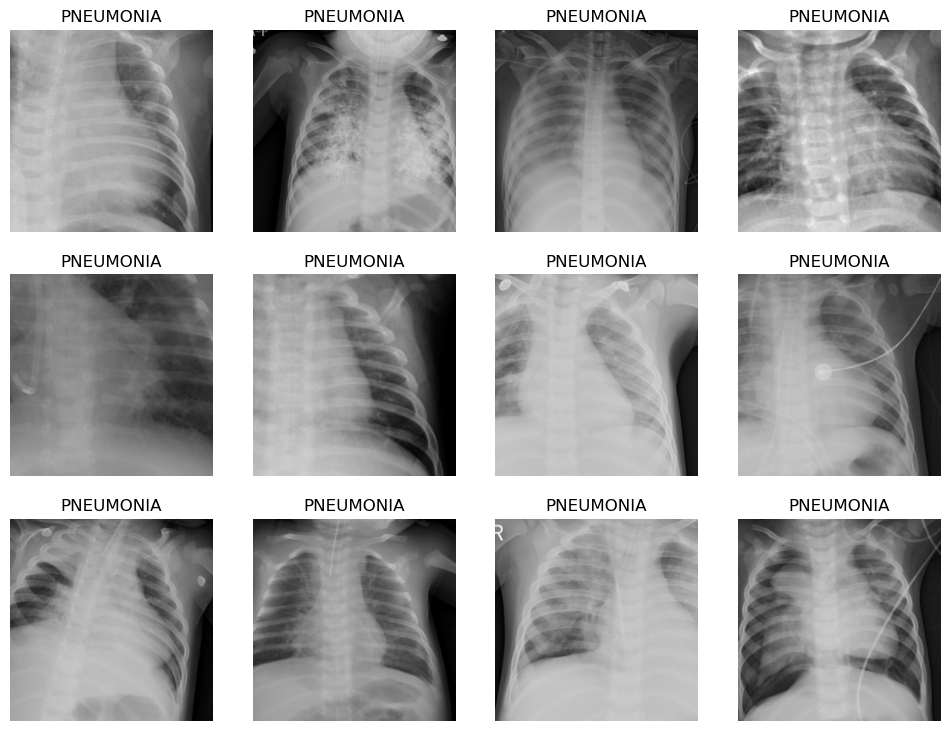

In [5]:
path = Path("/kaggle/input/preumonia/train")

fls = get_image_files(path)
failed = verify_images(path)

pneumonia = DataBlock(

    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=32),
    get_y=parent_label,
    item_tfms=Resize(240)
)


dls = pneumonia.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3)

In [25]:
learner = cnn_learner(dls, resnet34, metrics=accuracy)
learner.fine_tune(6)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.493511,0.181982,0.946309,02:46


epoch,train_loss,valid_loss,accuracy,time
0,0.153994,0.123296,0.967402,02:47
1,0.114620,0.109211,0.971237,02:48
2,0.064096,0.072141,0.980825,02:47
3,0.035117,0.101964,0.980825,02:48
4,0.016942,0.075489,0.981783,02:47
5,0.014294,0.072576,0.983701,02:46


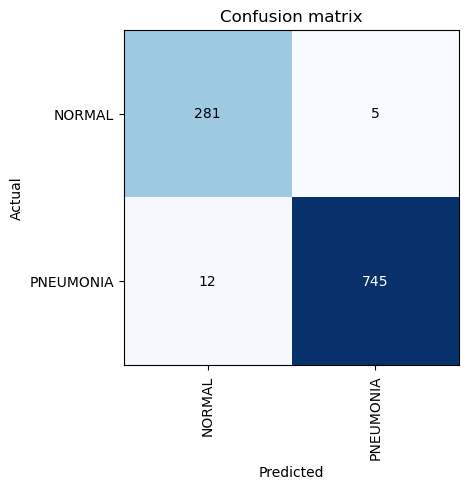

In [26]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [28]:
final_df = pd.read_csv("/kaggle/input/preumonia/sample_solution.csv")
final_df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [29]:
import cv2

# img = cv2.imread("/kaggle/input/preumonia/train/PNEUMONIA/person1003_bacteria_2934.jpeg")
# pred, pred_id, prob = learner.predict(img)
# print("Result:", pred)
# print("Probability:", prob[pred_id])

for i in range(0,624):
    label = final_df.iloc[i,0]
    img = cv2.imread('/kaggle/input/preumonia/test/'+label)
    pred, _, prob = learner.predict(img)
    final_df.iloc[i,1] = pred
    

In [31]:
final_df["labels"] = final_df["labels"].map({"PNEUMONIA": 1, "NORMAL": 0})
final_df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [30]:
final_df.head() 

,id,labels
0,test_img_10001.jpeg,PNEUMONIA
1,test_img_10002.jpeg,NORMAL
2,test_img_10003.jpeg,PNEUMONIA
3,test_img_10004.jpeg,PNEUMONIA
4,test_img_10005.jpeg,NORMAL


In [32]:
final_df.to_csv("Pneumonia_classification_new4.csv", index=False)